# <b><u> Project Title : Seoul Bike Sharing Demand Prediction(Regression) </u></b>

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## <b>1. Data Set Preparations:</b>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import warnings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading Dataset

In [ ]:
bikesharing_df = pd.read_csv("/content/drive/MyDrive/Capstone Project-II/SeoulBikeData .csv", encoding = 'unicode_escape')

##<b>2. Exporatory Data Analysis:</b>

In [ ]:
#First 5 observations
bikesharing_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Last 5 observations
bikesharing_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Shape of the dataset
bikesharing_df.shape

(8760, 14)

I have 8,760 observations and 14 columns in our dataset.

#**3.List of columns of the dataframe**


In [ ]:
bikesharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#description of the dataframe
bikesharing_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#A summary of the dataframe
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",bikesharing_df[col].unique())

In [ ]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Seasons','Holiday']
cat_unique_vals(categorical_columns,bikesharing_df)

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']


**We'll perform further checks for the values that categorical columns can take.**

In [ ]:
#Creating a function that performs a groupby operation and returns a dataframe for analysis
def create_bikesharing_df_analysis(col):
  return bikesharing_df.groupby(col)['Rented Bike Count'].sum().reset_index()

In [ ]:
#Seasons column
seasons_col = create_bikesharing_df_analysis('Seasons')
seasons_col

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


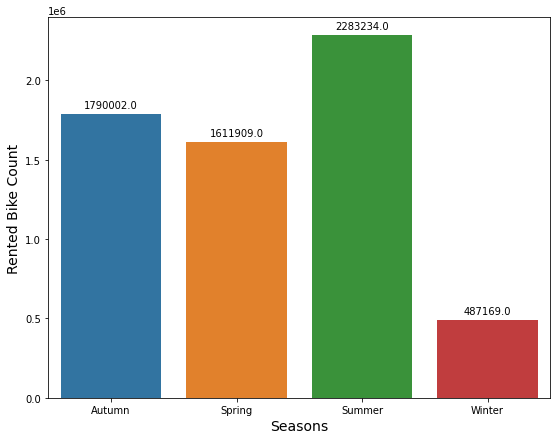

In [ ]:
#Creating a visualisation for the seasons column
plt.figure(figsize=(9,7))
splot = sns.barplot(data=seasons_col,x='Seasons',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

In [ ]:
#Initial preparations for plotting pie chart with percentages
seasons_list = list(seasons_col['Seasons']) 
rented_count_list = list(seasons_col['Rented Bike Count'])
palette_color = sns.color_palette('pastel')
explode = (0.05,0.05,0.05,0.05)

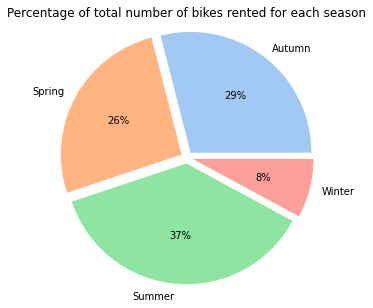

In [ ]:
#Creating the pie chart visualisation for seasons column
plt.figure(figsize=(5,5))
plt.pie(rented_count_list,labels=seasons_list,colors=palette_color,explode=explode,autopct='%0.0f%%')
plt.title("Percentage of total number of bikes rented for each season")
plt.axis("equal")  
plt.show()

<b>As we can see that summer has the highest number of bikes rented, 37%. This could be because of the vacation mood created in summer and also the increase in the number of tourists. Winter however is the season where the least number of bikes are rented, 8%.</b>

In [ ]:
#Holidays column
holidays_col = create_bikesharing_df_analysis('Holiday')
holidays_col

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


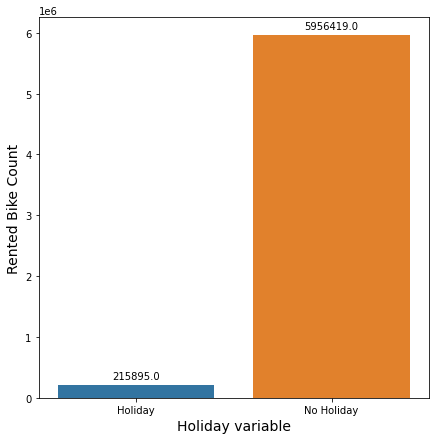

In [ ]:
#Creating a visualisation for the holidays dataframe
plt.figure(figsize=(7,7))
splot = sns.barplot(data=holidays_col,x='Holiday',y='Rented Bike Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Holiday variable",size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

<b>As we can see that the majority of the bikes rented are on days which are considered as No Holiday.</b>

<b>4.Analysing for different temperatures.</b>

In [ ]:
#Creating a visualisation to analyse the number of bikes rented for different temperatures
temp_bike = create_bikesharing_df_analysis('Temperature(°C)')
temp_bike

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96
...,...,...
541,38.0,1184
542,38.7,475
543,39.0,1033
544,39.3,531


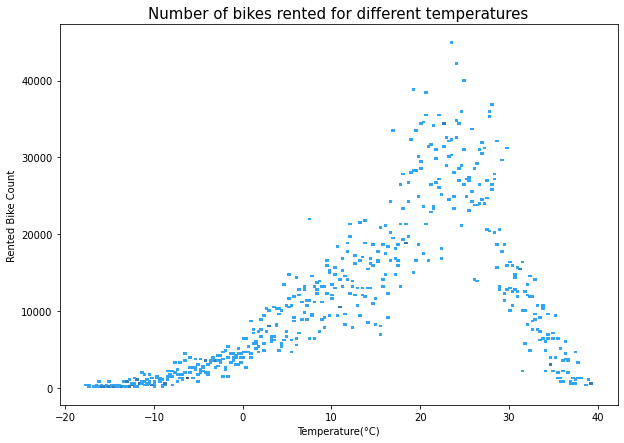

In [ ]:
#Creating a visualisation for different temperatures
plt.figure(figsize=(10,7))
sns.histplot(data=temp_bike,x='Temperature(°C)',y='Rented Bike Count',bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

<b>As we can see that the most number of bikes rented are in the temperature range of 15 degrees to 30 degrees.</b>

<b>5.Analysing for different intensities of humidity</b>

In [ ]:
#Creating a dataframe for analysing the number of bikes rented for different humidity percentages. 
humidity_bike = create_bikesharing_df_analysis('Humidity(%)')
humidity_bike

,Humidity(%),Rented Bike Count
0,0,6930
1,10,1315
2,11,1986
3,12,2032
4,13,4353
...,...,...
85,94,13669
86,95,12146
87,96,18962
88,97,28730


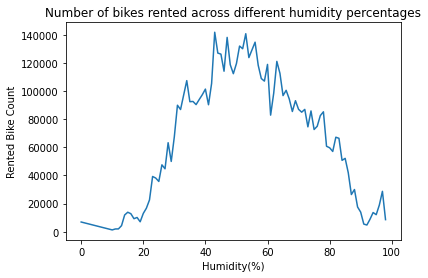

In [ ]:
#Plotting a visualisation for the different humidity percentages
plt.plot(humidity_bike['Humidity(%)'],humidity_bike['Rented Bike Count'])
plt.xlabel('Humidity(%)')
plt.ylabel("Rented Bike Count")
plt.title("Number of bikes rented across different humidity percentages")
plt.show()

In [ ]:
#Creating a dataframe to analyse the number of bikes rented for different hours of the day
hour_df = create_bikesharing_df_analysis("Hour")
hour_df

,Hour,Rented Bike Count
0,0,197633
1,1,155557
2,2,110095
3,3,74216
4,4,48396
5,5,50765
6,6,104961
7,7,221192
8,8,370731
9,9,235784


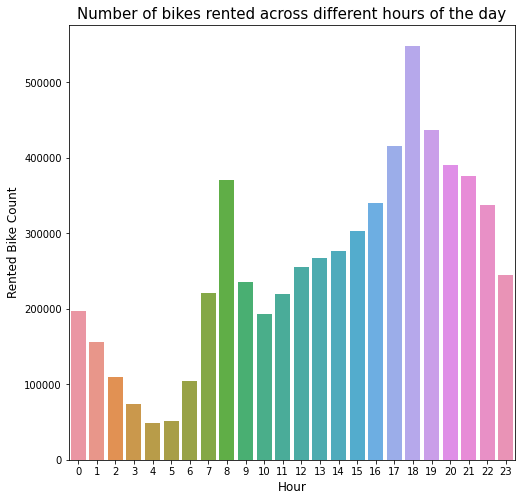

In [ ]:
#Creating a visualisation for different hours of the day
plt.figure(figsize=(8,8))
sns.barplot(data=hour_df,x='Hour',y='Rented Bike Count')
plt.title('Number of bikes rented across different hours of the day',size=15)
plt.xlabel('Hour',size=12)
plt.ylabel('Rented Bike Count',size=12)
plt.show()

<b>Here we can see that the highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.</b>

In [ ]:
#Creating a dataframe to analyse the number of bikes rented for different visibility rates
visibility_bike = create_bikesharing_df_analysis('Visibility (10m)')
visibility_bike

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65
...,...,...
1784,1996,19547
1785,1997,18324
1786,1998,19518
1787,1999,18466


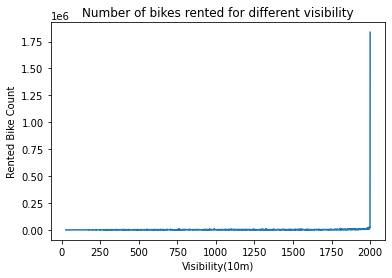

In [ ]:
#Creating a visualisation for number of bikes rented in different visibility ranges
plt.plot(visibility_bike['Visibility (10m)'],visibility_bike['Rented Bike Count'])
plt.xlabel('Visibility(10m)')
plt.ylabel('Rented Bike Count')
plt.title('Number of bikes rented for different visibility')
plt.show()

**We can see that higher visibility is preffered by the customers. Through further analysis of the visibility_bike dataframe we can see that for increasing visibility there is an increase in bikes rented.**

## <b>6.Data Clean Up:</b>

### <b>1.Handling null values:</b>

Missing data is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.

Missing values can bias the results of the machine learning models and/or reduce the accuracy of the model. 

Therefore it is an essential practice to handle null values before training our model. There are two main ways of handling null values, one is to delete the observations containing null values and the other is to impute the null values with some meaning full values.

In [ ]:
#Checking for null values
bikesharing_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<b>As we can see there are no null values present in our dataset and therefore we are good to go.</b> 

###<b>2.Handling duplicate values:</b>

When two features have the same set of values they are known as duplicate values.

Duplicate values can cause detrimental effect on our accuracy. Duplicate values can ruin the split between train,test and validation set, which ultimately leads to a biased performance estimates that disappoint the model in production.

The best way of dealing with duplicate values is to delete them.

In [ ]:
#Checking for duplicate values
bikesharing_df.duplicated().sum()

0

<b>As we can see there are no null values present in our dataset and therefore we are good to go.</b> 

###<b>7.Removing outliers:</b>

Outliers are those data points that are significantly different from the rest of the data points in the dataset. These can cause the data to skew and affect the accuracy of the ML model. 

In [ ]:
#Creating a list of columns that can possibly contain outliers
possible_outlier_cols = list(set(bikesharing_df.describe().columns)-{'Rented Bike Count','Hour'})
possible_outlier_cols

['Dew point temperature(°C)',
 'Visibility (10m)',
 'Humidity(%)',
 'Temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Wind speed (m/s)']

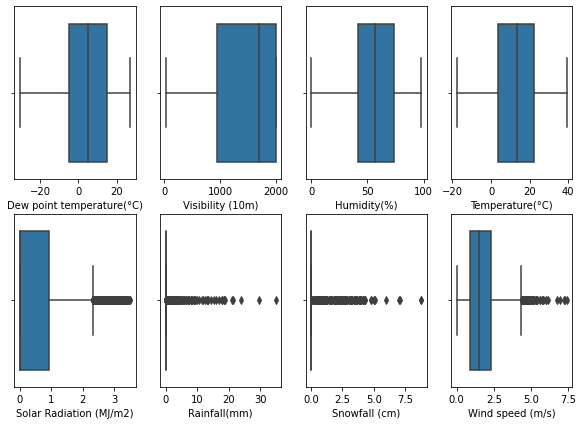

In [ ]:
#Creating a boxplot to detect columns with outliers
plt.figure(figsize=(10,7))
for index,item in enumerate(possible_outlier_cols):
  plt.subplot(2,4,index+1)
  sns.boxplot(bikesharing_df[item])

<b>Here we can see that the columns that contain outliers are Rainfall, Snowfall, Windspeed and Solar Radiation</b>

In [ ]:
#Creating a list of columns that contains outliers
outlier_cols = ['Rainfall(mm)','Wind speed (m/s)','Snowfall (cm)','Solar Radiation (MJ/m2)']
outlier_cols

['Rainfall(mm)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)']

In [ ]:
#Finding the inter-quartile range for the columns with outliers
Q1 = bikesharing_df[outlier_cols].quantile(0.25)
Q3 = bikesharing_df[outlier_cols].quantile(0.75)
IQR = Q3-Q1
IQR

Rainfall(mm)               0.00
Wind speed (m/s)           1.40
Snowfall (cm)              0.00
Solar Radiation (MJ/m2)    0.93
dtype: float64

In [ ]:
#Calculating the upper and lower fence for outlier removal
upper_fence = Q3 + (1.5*IQR)
lower_fence = Q1 - (1.5*IQR)

In [ ]:
#Detecting and removing the outliers
bikesharing_df[outlier_cols] = bikesharing_df[outlier_cols][~((bikesharing_df[outlier_cols] < lower_fence) | (bikesharing_df[outlier_cols] > upper_fence))]

In [ ]:
#Checking the number of outliers deleted
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8599 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8119 non-null   float64
 9   Rainfall(mm)               8232 non-null   float64
 10  Snowfall (cm)              8317 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<b>Due to outlier deletion, some null values have been created in these 4 columns.Now, we can either delete the observations with null values or impute them with some meaning full values. In this case I will be imputing them with the median value of each column.

Note: Usually mean is chosen to impute null values, but I'll be choosing the median because mean is affected very much by outliers whereas the median is not.</b>

In [ ]:
#creating a function to impute the null values created by outlier handling.
def impute_null(outlier_cols):
  for col in outlier_cols:
    bikesharing_df[col].fillna(bikesharing_df[col].median(),inplace=True)

In [ ]:
#Calling the imputing function
impute_null(outlier_cols)

In [ ]:
#Checking if the imputation is successful
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

<b>The imputation is successful and therefore we have handled the outliers successfully</b>

## <b>8.Feature Engineering:</b>

### <b>1.Feature encoding:</b>
Machine learning models can only work with numerical values and therefore important categorical columns have to converted/encoded into numerical variables. This process is known as <b>Feature Encoding</b>

Here we have three columns that require encoding and they are Seasons, Holiday and Functioning Day. 

In [ ]:
#Encoding for Seasons column
bikesharing_df['Winter'] = np.where(bikesharing_df['Seasons']=='Winter', 1, 0)
bikesharing_df['Spring'] = np.where(bikesharing_df['Seasons']=='Spring', 1, 0)
bikesharing_df['Summer'] = np.where(bikesharing_df['Seasons']=='Summer', 1, 0)
bikesharing_df['Autumn'] = np.where(bikesharing_df['Seasons']=='Autumn', 1, 0)

In [ ]:
#Removing seasons column since we dont require it now.
bikesharing_df.drop(columns=['Seasons'],axis=1,inplace=True)

In [ ]:
#Encoding for Holiday column
bikesharing_df['Holiday'] = np.where(bikesharing_df['Holiday']=='Holiday',1,0)

In [ ]:
#Encoding for Functioning day
bikesharing_df['Functioning Day'] = np.where(bikesharing_df['Functioning Day']=='Yes',1,0)

In [ ]:
#Look of the dataframe after encoding all three columns
bikesharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Winter,Spring,Summer,Autumn
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,0,0,0


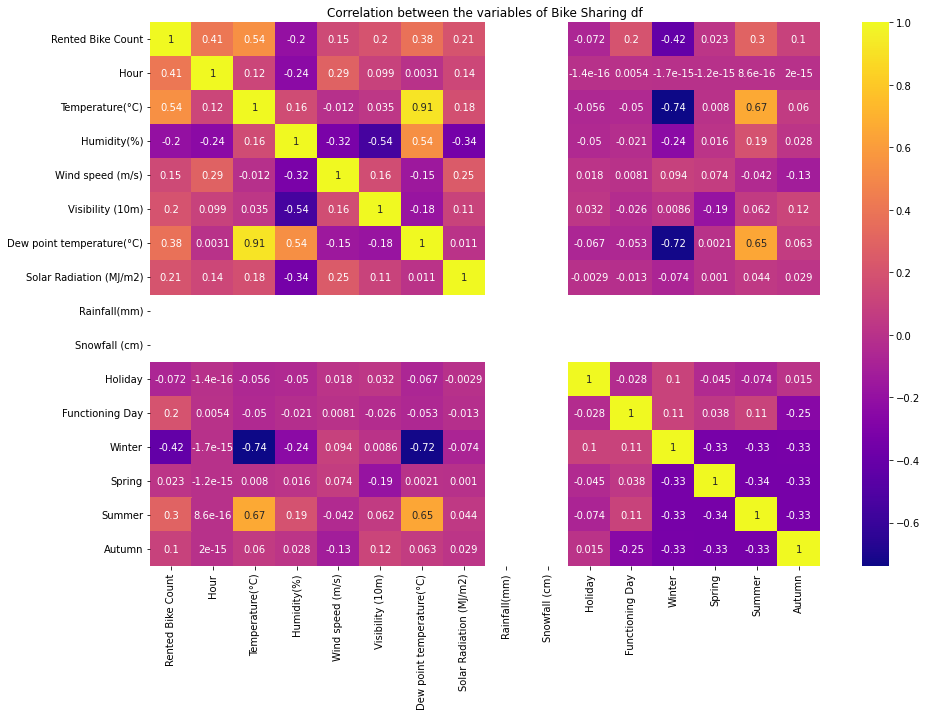

In [ ]:
#Plotting correlation matrix using sns.heatmap
corr_matrix = bikesharing_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='plasma')
plt.title('Correlation between the variables of Bike Sharing df')
plt.show()

<b>The Dew point temperature column is highly correlated to the Temperature column and therefore we can remove it and it most likely won't affect our model building much, so we will drop the dew point temperature column.

I will also remove the date column because I don't think it adds any value.</b>

In [ ]:
#Dropping unnecessary columns
bikesharing_df.drop(columns={'Dew point temperature(°C)','Date'},axis=1,inplace=True)

In [ ]:
bikesharing_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Winter',
       'Spring', 'Summer', 'Autumn'],
      dtype='object')

### <b>9.VIF (Veriance Inflation Factor):</b>
Multicollinearity is when two independent variables are highly correlated to each other.

Multicollinearity affects the accuracy of the regression models, and therefore we will check if we have multicollinearity in our dataset and solve it by removing columns which cause multicollinearity.

<b>Note:</b> I will check the multicollinearity of our dataset by using the variance inflation factor. Accepted VIF is less than 10.

In [ ]:
#Creating a list of independent columns
idv_cols = list(set(bikesharing_df.columns)-{'Rented Bike Count'})

In [ ]:
#Creating a function to calculate the variance inflation factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Columns"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
#Calculating the VIF for independent columns
calc_vif(bikesharing_df[idv_cols])

,Columns,VIF
0,Visibility (10m),1.629212
1,Humidity(%),2.042755
2,Spring,23.455815
3,Temperature(°C),4.443786
4,Holiday,1.022255
5,Winter,20.853971
6,Solar Radiation (MJ/m2),1.270845
7,Rainfall(mm),NaN
8,Snowfall (cm),NaN
9,Wind speed (m/s),1.234386


We can see that the seasons encoding have very high VIF therefore we will eliminate one of the columns. We will drop winter because it has the lowest bikes rented. The columns Rainfall and Snowfall have no VIF at all so we will drop them too.

In [ ]:
#Dropping the Unnecessary columns
bikesharing_df.drop(columns={'Winter','Rainfall(mm)','Snowfall (cm)'},axis=1,inplace=True)

In [ ]:
#Creating a list of remaining independent columns 
idv_cols = list(set(bikesharing_df.columns)-{'Rented Bike Count'})

In [ ]:
#Calculating VIF for remaining independent columns
calc_vif(bikesharing_df[idv_cols])

,Columns,VIF
0,Visibility (10m),7.345935
1,Humidity(%),10.462240
2,Spring,3.976104
3,Temperature(°C),9.607644
4,Holiday,1.071381
5,Solar Radiation (MJ/m2),1.652737
6,Functioning Day,18.833311
7,Wind speed (m/s),4.834994
8,Summer,9.199786
9,Autumn,4.448885


We can see that Functioning Day has a VIF>10 therefore we will remove it.

In [ ]:
#Dropping the Functioning Day column 
bikesharing_df.drop(columns={'Functioning Day'},axis=1,inplace=True)

In [ ]:
#Creating a list with remaining independent columns
idv_cols = list(set(bikesharing_df.columns)-{'Rented Bike Count'})

In [ ]:
#Calculating the VIF for remaining independent columns
calc_vif(bikesharing_df[idv_cols])

,Columns,VIF
0,Visibility (10m),5.216380
1,Humidity(%),5.401113
2,Spring,3.927898
3,Temperature(°C),9.481974
4,Holiday,1.070809
5,Solar Radiation (MJ/m2),1.598384
6,Wind speed (m/s),4.707847
7,Summer,9.167621
8,Autumn,4.437701
9,Hour,4.025525


<b>Now that we don't have any variable with VIF>10 we can move ahead.</b>

### <b>Obtaining correlation between independent and dependent variables:</b>
We will use a regression plot to find this correlation. This also finds if the independent variable has a linear relationship with the dependent variable, which is an assumption that has to be satisfied for models like linear regression.

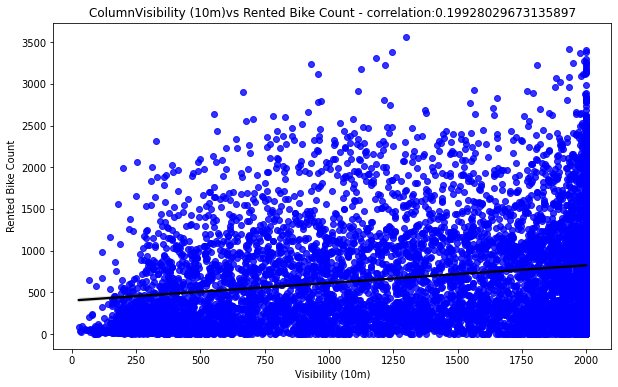

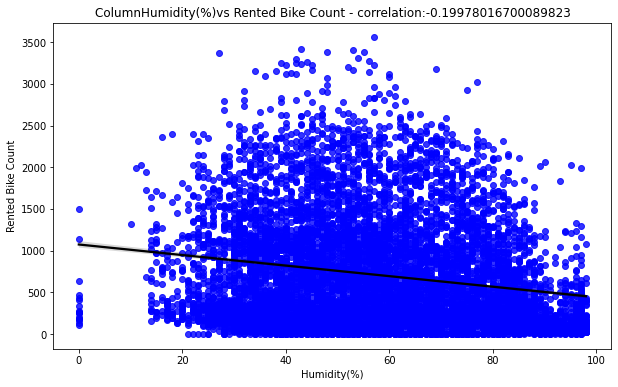

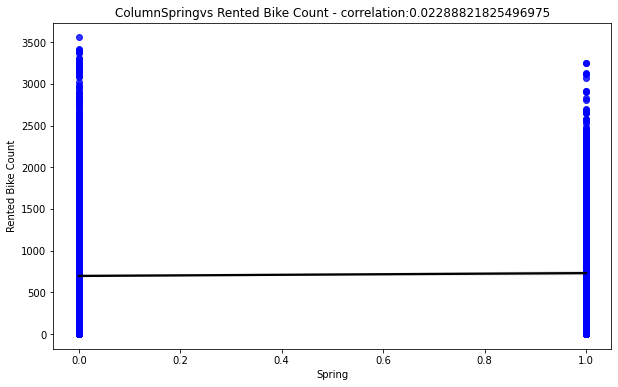

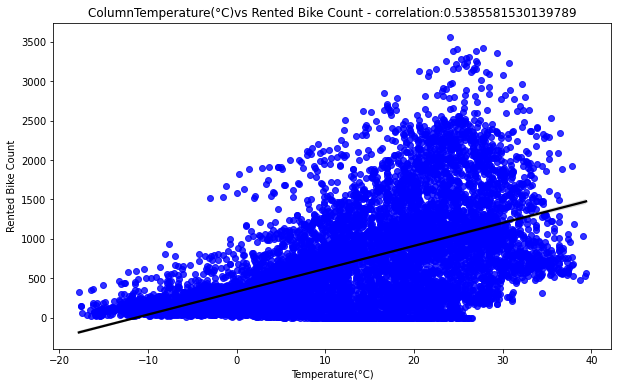

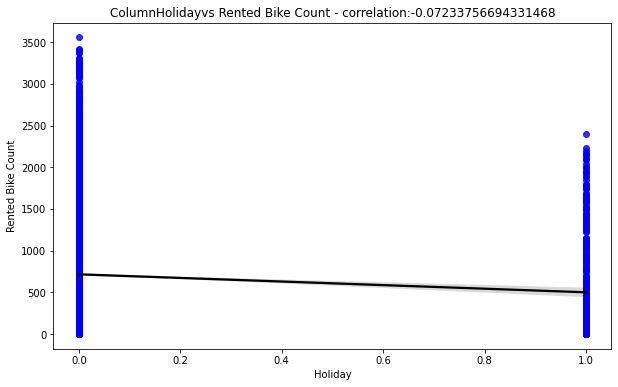

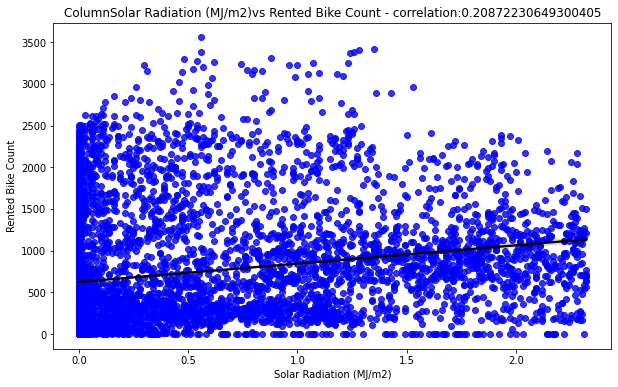

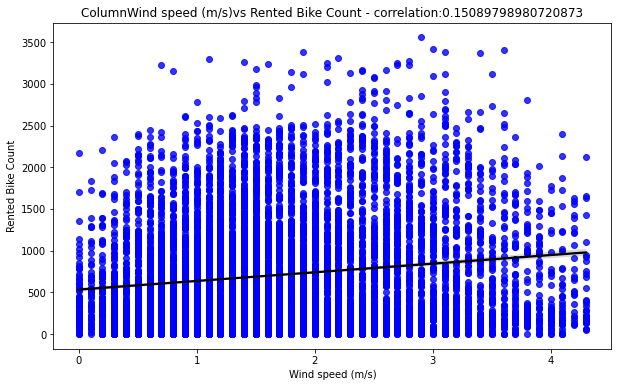

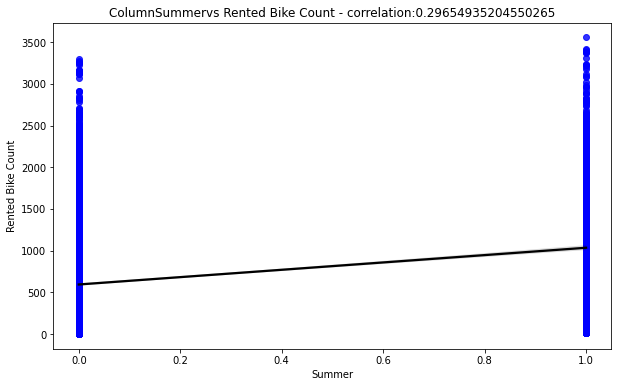

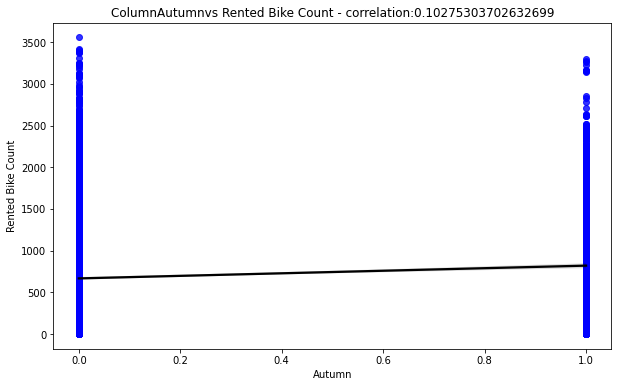

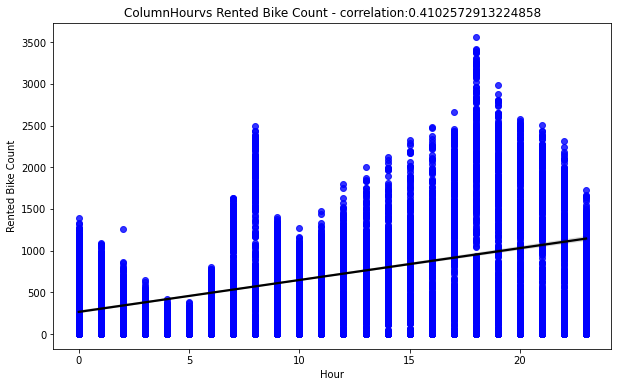

In [ ]:
#printing the regression plot for all the numerical features
for col in idv_cols:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bikesharing_df[col],y=bikesharing_df['Rented Bike Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"})
  corr=bikesharing_df[col].corr(bikesharing_df['Rented Bike Count'])
  ax.set_title('Column'+ col+'vs Rented Bike Count - correlation:'+str(corr))

<b>We can see that all the remaining columns that we have, have a linear relationship with the dependent variable. So we have satisfied the assumption.</b>

## <b>10.Pre-Processing of the Data:</b>

In [ ]:
#Creating the dataset for independent and dependent variables
X = bikesharing_df.drop(columns={'Rented Bike Count'},axis=1)
Y = bikesharing_df['Rented Bike Count']

In [ ]:
#First look of the independent variable dataset
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Spring,Summer,Autumn
0,0,-5.2,37,2.2,2000,0.0,0,0,0,0
1,1,-5.5,38,0.8,2000,0.0,0,0,0,0
2,2,-6.0,39,1.0,2000,0.0,0,0,0,0
3,3,-6.2,40,0.9,2000,0.0,0,0,0,0
4,4,-6.0,36,2.3,2000,0.0,0,0,0,0


In [ ]:
#First look of the dependent variable dataset
Y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

### <b>11.Target feature conditioning:</b>
The distribution of the target feature is observed and in this case because it is a positively skewed distribution it is normalised using square root transformation.

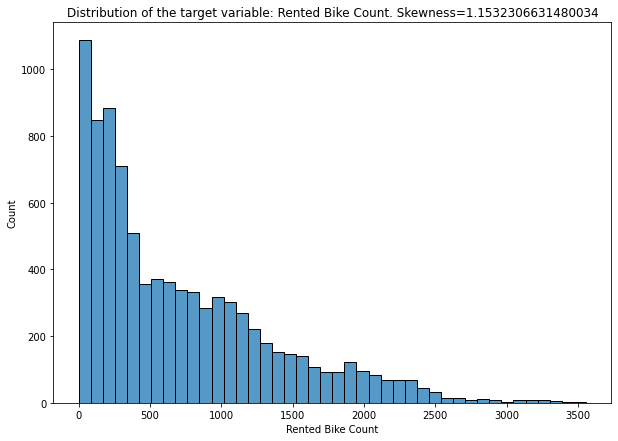

In [ ]:
#Checking for the distribution of the Target variable
from scipy.stats import skew
plt.figure(figsize=(10,7))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str(skew(bikesharing_df['Rented Bike Count'])))
sns.histplot(data=bikesharing_df,x='Rented Bike Count')
plt.show()

In [ ]:
#Applying square root transformation on the dependent variable
Y = np.sqrt(Y)

In [ ]:
#Creating a dataframe with values of Y for visualisation purposes
vis_Y = Y.reset_index()

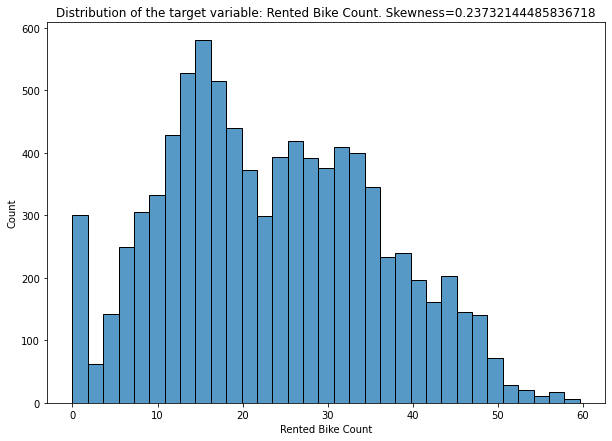

In [ ]:
#Checking how well the square root transformation has worked
plt.figure(figsize=(10,7))
plt.title("Distribution of the target variable: Rented Bike Count. Skewness="+str(skew(vis_Y['Rented Bike Count'])))
sns.histplot(data=vis_Y,x='Rented Bike Count')
plt.show()

<b>We can see that the target variable has been normalised and we are good to go.</b>

### <b>12.Testing And Training The Module (Creating the test and train Dataset):</b>

In [ ]:
#Import the Required Librires for training and Testing the module or dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#Splitting the dataset into test and train datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
#Shape of the train and Test set of the independent values
X_train.shape


(6570, 10)

In [ ]:
X_test.shape

(2190, 10)

### <b>13.Feature Scaling:</b>
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Two ways of feature scaling:

1. Min max normalization

2. Standardisation

In this project I'm going to use the standardisation method with the help of the StandardScaler() function.

In [ ]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [ ]:
#Standardizing the independent variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Overview of what a dataframe looks like after standardizing
X_train

array([[ 1.66765533, -0.74954694,  1.22697808, ..., -0.5807482 ,
        -0.57582707,  1.72819284],
       [ 0.36544652,  0.93615918, -0.54181953, ...,  1.72191666,
        -0.57582707, -0.57863913],
       [ 1.08889586, -1.65916064, -1.22968527, ..., -0.5807482 ,
        -0.57582707, -0.57863913],
       ...,
       [-0.06862308,  1.06133538, -0.05048686, ..., -0.5807482 ,
         1.73663249, -0.57863913],
       [-1.66021162, -0.37401835,  0.04777967, ...,  1.72191666,
        -0.57582707, -0.57863913],
       [ 1.23358573, -0.47415931,  1.22697808, ...,  1.72191666,
        -0.57582707, -0.57863913]])

In [ ]:
X_test

array([[-1.23340243, -0.21029684,  0.6958367 , ...,  1.72470045,
        -0.59457789, -0.56926521],
       [-1.37720307,  0.720227  ,  0.9412363 , ..., -0.57981083,
        -0.59457789,  1.75665048],
       [ 0.7798066 , -0.81090769,  0.30319736, ..., -0.57981083,
        -0.59457789, -0.56926521],
       ...,
       [ 0.34840467,  1.61691361, -1.16920019, ..., -0.57981083,
         1.68186543, -0.56926521],
       [ 0.06080338,  0.060401  , -0.43300142, ..., -0.57981083,
        -0.59457789,  1.75665048],
       [ 0.34840467,  1.2785413 , -0.77656084, ..., -0.57981083,
         1.68186543, -0.56926521]])

## <b> 14.Model Implementation:</b>
Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

In this project we are dealing with a regression problem, therefore we will be using regression models. Some popular examples are Linear Regression and polynomial regression.

In this project we will be include the following models:
1. Linear regression.
2. Ridge regression (Linear regression with L2 regularization).
3. Lasso regression (Linear regression with L1 regularization).
4. Random forest regression.

### <b>15.Linear regression:</b>
As stated earlier linear regression is a regression technique, and it comes under supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable value (x). So, this regression technique finds out a linear relationship between x (input) and y(output)

In [ ]:
#Training the linear regression model
lr_model = LinearRegression().fit(X_train,Y_train)

In [ ]:
#Checking the score of the linear regression model
lr_model.score(X_train,Y_train)

0.4827923516054774

In [ ]:
#Checking the coefficient values of the linear regression model
lr_model.coef_

array([ 3.4929119 ,  4.43820835, -3.25571533, -0.00611553,  0.20455542,
        0.1619329 , -0.7878579 ,  2.44910325,  3.1553882 ,  2.72281164])

In [ ]:
#Predicting the value of the dependent variable for train and test dataset
Y_train_pred_lr = lr_model.predict(X_train)
Y_test_pred_lr = lr_model.predict(X_test)

In [ ]:
#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred,model):
   plt.figure(figsize=(10,7))
   plt.title("The comparison of actual values and predictions obtained by "+model) 
   plt.plot(np.array((Y_test)))
   plt.plot((y_pred),color='red')
   plt.legend(["Actual","Predicted"])
   plt.show()

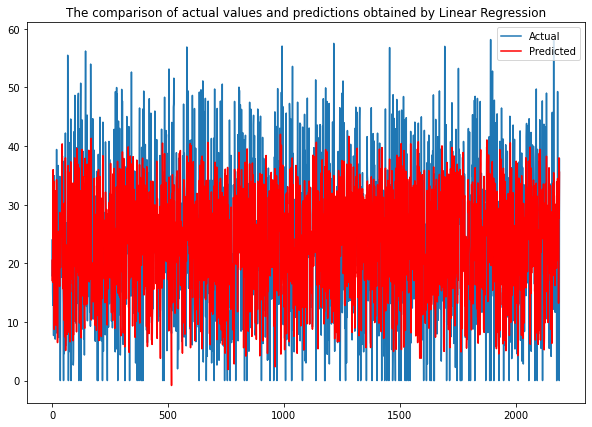

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Linear Regression
plot_comparison(Y_test_pred_lr,'Linear Regression')

In [ ]:
#Creating a function to calculate and display the evaluation metrics for the model
def eval_metrics(y_pred,model):
  print("The evaluation metrics for "+model+" are given as:")
  MSE  = mean_squared_error(Y_test,y_pred)      #Mean squared error for test set
  print("MSE :" , MSE)
  
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)
  
  r2_test = r2_score(Y_test,y_pred)             #r2 score for prediction on test set
  print("R2 :" ,r2_test)
  
  a_r2_test = 1-(1-r2_score(Y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))     #adjusted r2 score for test set
  print("Adjusted R2 :",a_r2_test)

In [ ]:
#Calculating the evaluation metrics for Linear Regression
eval_metrics(Y_test_pred_lr,'Linear Regression')

The evaluation metrics for Linear Regression are given as:
MSE : 86.39593253656747
RMSE : 9.294941233626357
R2 : 0.4530740036673806
Adjusted R2 : 0.4505640174519946


### <b>16.Ridge Regression:</b>
Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [ ]:
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_model_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {ridge_model_grid.best_params_}')
print(f'\nUsing {ridge_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')

The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 35}

Using {'alpha': 35} as the value for aplha gives us a negative mean squared error of: -80.01666506008738


In [ ]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
ridge_model=Ridge(alpha=35).fit(X_train,Y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_ridge = ridge_model.predict(X_test)

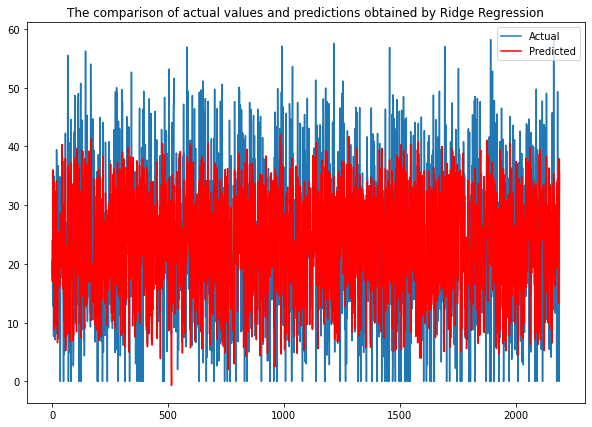

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Ridge Regression
plot_comparison(Y_test_pred_ridge,'Ridge Regression')

In [ ]:
#Calculating the evaluation metrics for Ridge Regression
eval_metrics(Y_test_pred_ridge,'Ridge Regression')

The evaluation metrics for Ridge Regression are given as:
MSE : 86.39135788258078
RMSE : 9.294695147372009
R2 : 0.4531029633315232
Adjusted R2 : 0.4505931100195981


As we can see there is only a very slight difference between the results achieved through Linear regression and Ridge regression.

### <b>17.Lasso Regression:</b>
Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

In [ ]:
#Creating a Lasso regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_model_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [ ]:
#Getting the best parameters for Lasso regression fetched through GridSearchCV
print(f'The best value for alpha in ridge regression through GridSearchCV is found to be {lasso_model_grid.best_params_}')
print(f'\nUsing {lasso_model_grid.best_params_} as the value for aplha gives us a negative mean squared error of: {lasso_model_grid.best_score_}')

The best value for alpha in ridge regression through GridSearchCV is found to be {'alpha': 0.8}

Using {'alpha': 0.8} as the value for aplha gives us a negative mean squared error of: -84.8604928769993


In [ ]:
#Fitting the Ridge regression model on the dataset with appropriate alpha value
lasso_model=Lasso(alpha=0.8).fit(X_train,Y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_lasso = lasso_model.predict(X_test)

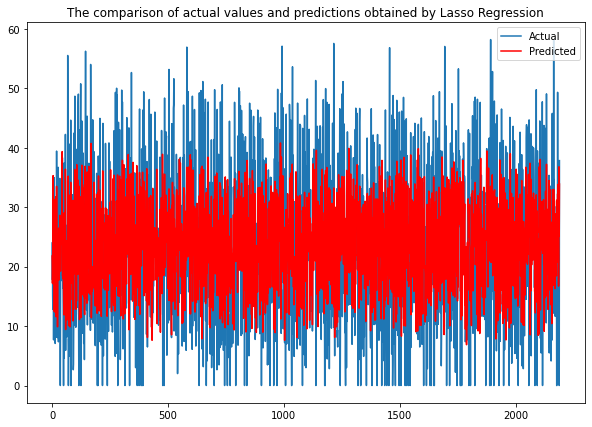

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Lasso Regression
plot_comparison(Y_test_pred_lasso,'Lasso Regression')

In [ ]:
#Calculating the evaluation metrics for Lasso Regression
eval_metrics(Y_test_pred_lasso,'Lasso Regression')

The evaluation metrics for Lasso Regression are given as:
MSE : 90.60520391122219
RMSE : 9.518676584022707
R2 : 0.42642737954022036
Adjusted R2 : 0.4237951050085096


<b>The model quality has depreciated by using the lasso regression method.</b>

### <b>18.Random Forest Regression:</b>
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
#Creating a Random Forest Regression model using GridSearchCV
rand_forest = RandomForestRegressor()


parameters = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
             'max_depth' : [10,15,20],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2],
             'bootstrap' : [True,False]
             }

rf_model_grid = GridSearchCV(rand_forest,parameters,scoring='r2',cv=5)
rf_model_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 12, 15, 17, 20]},
             scoring='r2')

In [ ]:
#Getting the best parameters for Random Forest regression fetched through GridSearchCV
print(f'The best value for parameters in random forest regression through GridSearchCV is found to be {rf_model_grid.best_params_}')
print(f'\nUsing {rf_model_grid.best_params_} as the value for the parameters in random forest model, it gives us a negative mean squared error of: {rf_model_grid.best_score_}')

The best value for parameters in random forest regression through GridSearchCV is found to be {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 17}

Using {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 17} as the value for the parameters in random forest model, it gives us a negative mean squared error of: 0.7126251012876296


In [ ]:
#Fitting Random Forest model on the dataset with appropriate paramter values
rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=15).fit(X_train,Y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_rf = rf_model.predict(X_test)

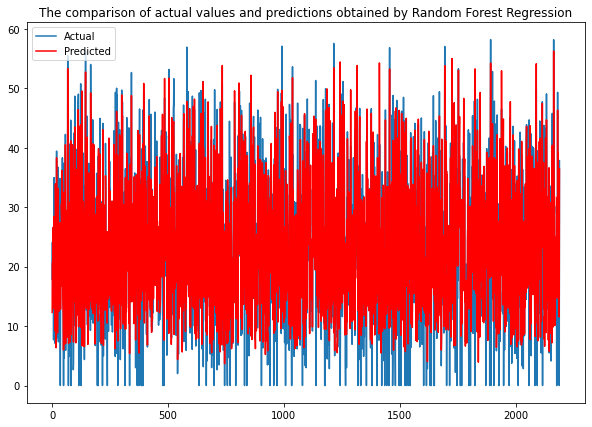

In [ ]:
#Plotting the comparison between actual and predicted values obtained by Random Forest Regression
plot_comparison(Y_test_pred_rf,'Random Forest Regression')

In [ ]:
#Calculating the evaluation metrics for Random Forest Regression
eval_metrics(Y_test_pred_rf,'Random Forest Regression')

The evaluation metrics for Random Forest Regression are given as:
MSE : 52.086384845427844
RMSE : 7.217089776733268
R2 : 0.6702692234395126
Adjusted R2 : 0.6687560028036224


<b>As we can see the quality of model prediction has drastically improved.</b>

## <b>19. Model Explainability:</b>
Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model. 

Popular techniques for model explainability:
1. LIME
2. SHAP
3. ELI-5

In this project I'll be using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.

In [ ]:
#Installing the shap library
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 18.0 MB/s eta 0:00:00


In [ ]:
#Initialising javascript for visualisation of SHAP
import shap

In [ ]:
#Creating a function to plot the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X.columns)

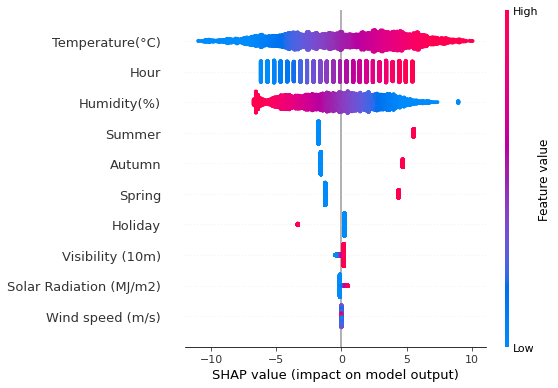

In [ ]:
#Plotting shap summary plot for linear regression
shap_summary(lr_model)

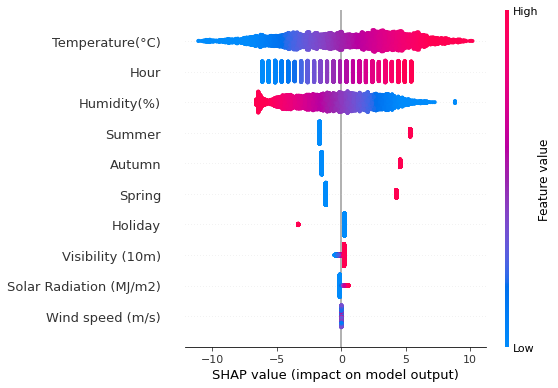

In [ ]:
#Plotting shap summary plot for Ridge regression
shap_summary(ridge_model)

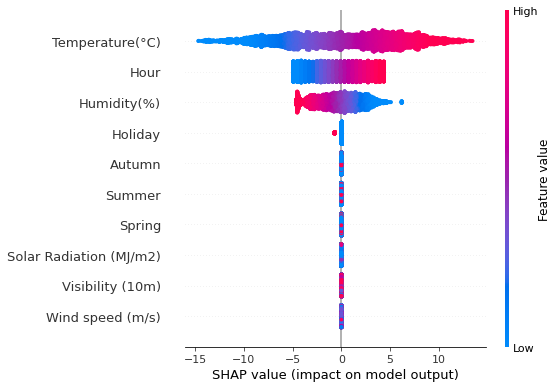

In [ ]:
#Plotting shap summary plot for Lasso regression
shap_summary(lasso_model)

100%|===================| 6562/6570 [00:42<00:00]       

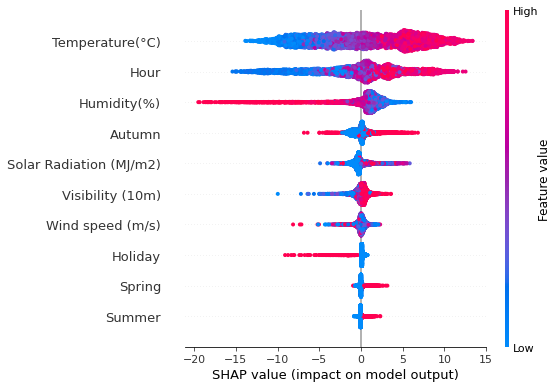

In [ ]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False) 
shap.summary_plot(shap_values,X_train,feature_names=X.columns)

**We see that different importance or impact power is given to the features by each model and that defines how well the model performs on prediction. Random forest gives almost all the features a significant impact power and therefore it performs the best out of all the 4 models.**


**By looking at the SHAP summary plot for each model, we can figure out the feature importance and also its impact power by understanding the SHAP values.**

##<b>20.Conclusion:</b>
**1. EDA insights:**
  * Most number of bikes are rented in the Summer season and the lowest in the winter season.
  * Over 96% of the bikes are rented on days that are considered as No Holiday.
  * Most number of bikes are rented in the temperature range of 15 degrees to 30 degrees.
  * The highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.
  * Most of the bike rentals have been made when there is high visibility.

**2. Results from ML models:**
  * Random Forest Regression is the best performing model with an r2 score of 0.6645.
  * Lasso Regression(L1 regularization) is the worst performing model with an r2 score of 0.4264.
  * Actual vs Prediction visualisation is done for all the 4 models.
  * All 4 models have been explained with the help of SHAP library.
  * Temperature and Hour are the two most important factors according to all the models.

**3. Challenges faced:**
  * Removing Outliers.
  * Encoding the categorical columns.
  * Removing Multicollinearity from the dataset.
  * Choosing Model explainability technique.